
#MATHGR5430 MACHINE LEARNING FOR FINANCE, SPRING 2025
<center>
<h1>Homework 1</h1>
</center>


##Submission Instructions


Before you begin working on the assignment, make a copy of this notebook by clicking "File" > "Make a copy..." and save it to your Google Drive. Rename the copy if needed to include your name or UNI. Once you've completed the assignment, click on "Share" in your notebook's top-right corner and set the "General access" to "LionMail Only" with the role set to Editor. Copy the shared URL and include it with your homework submission at Coursework.

## 1 Data Preparation and Exploration


### 1. Download

1.1 Download the S&P 500 ETF (SPY) dataset from 01/01/2020 to the present, obtained via the yfinance package.

In [ ]:
# Obtain yfinance package
!pip install yfinance

import yfinance as yf
import pandas as pd

# the download part is written in the next subsection

### 2. Inspect
2.1 Load the dataset into a Pandas DataFrame

In [ ]:
# Download SPY data from 01/01/2020 to present
spy_data = yf.download("SPY", start="2020-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'), auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


2.2 Print the first 5 rows and identify any missing values.

In [ ]:
# Print first 5 rows
print(spy_data.head())

# Check for missing values in each column
print("\nMissing values per column:")
print(spy_data.isnull().sum())

Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2020-01-02  301.194885  324.869995  324.890015  322.529999  323.540009   
2020-01-03  298.914154  322.410004  323.640015  321.100006  321.160004   
2020-01-06  300.054565  323.640015  323.730011  320.359985  320.489990   
2020-01-07  299.210876  322.730011  323.540009  322.239990  323.019989   
2020-01-08  300.805450  324.450012  325.779999  322.670013  322.940002   

Price         Volume  
Ticker           SPY  
Date                  
2020-01-02  59151200  
2020-01-03  77709700  
2020-01-06  55653900  
2020-01-07  40496400  
2020-01-08  68296000  

Missing values per column:
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64


### 3. Clean the Data
3.1 Drop missing values

In [ ]:
# Drop rows containing any missing values
spy_data = spy_data.dropna()

# Verify that no missing values remain
print("Missing values after dropna():")
print(spy_data.isnull().sum())

Missing values after dropna():
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64


3.2 Add a new column for Daily Return
$$ \text{Daily Return} = \frac{\text{Close Price (Today)} - \text{Close Price (Yesterday)}}{\text{Close Price (Yesterday)}} $$

In [ ]:
# use Pandas' built-in pct_change() for calculating daily return and put in new column
spy_data[('Daily_Return', 'SPY')] = spy_data[('Close', 'SPY')].pct_change()

# Print the first few rows to confirm the new column
print(spy_data.head())

Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2020-01-02  301.194885  324.869995  324.890015  322.529999  323.540009   
2020-01-03  298.914154  322.410004  323.640015  321.100006  321.160004   
2020-01-06  300.054565  323.640015  323.730011  320.359985  320.489990   
2020-01-07  299.210876  322.730011  323.540009  322.239990  323.019989   
2020-01-08  300.805450  324.450012  325.779999  322.670013  322.940002   

Price         Volume Daily_Return  
Ticker           SPY          SPY  
Date                               
2020-01-02  59151200          NaN  
2020-01-03  77709700    -0.007572  
2020-01-06  55653900     0.003815  
2020-01-07  40496400    -0.002812  
2020-01-08  68296000     0.005330  


### 4. Explore the Data
4.1 Plot the Ajusted Close Price over time.

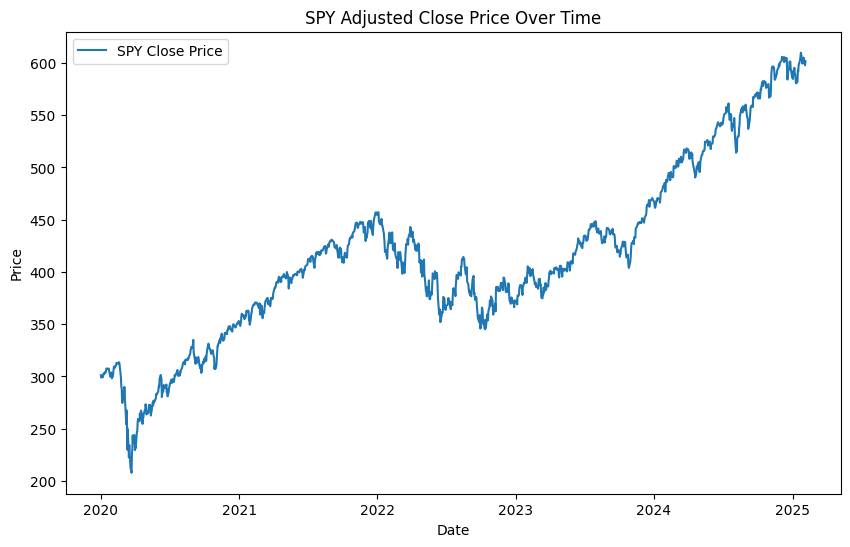

In [ ]:
import matplotlib.pyplot as plt

# Plot the Close price for SPY over time
plt.figure(figsize=(10, 6))
plt.plot(spy_data[('Adj Close', 'SPY')], label='SPY Close Price')
plt.title('SPY Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

4.2 Visualize the distribution of daily returns (e.g., histogram).


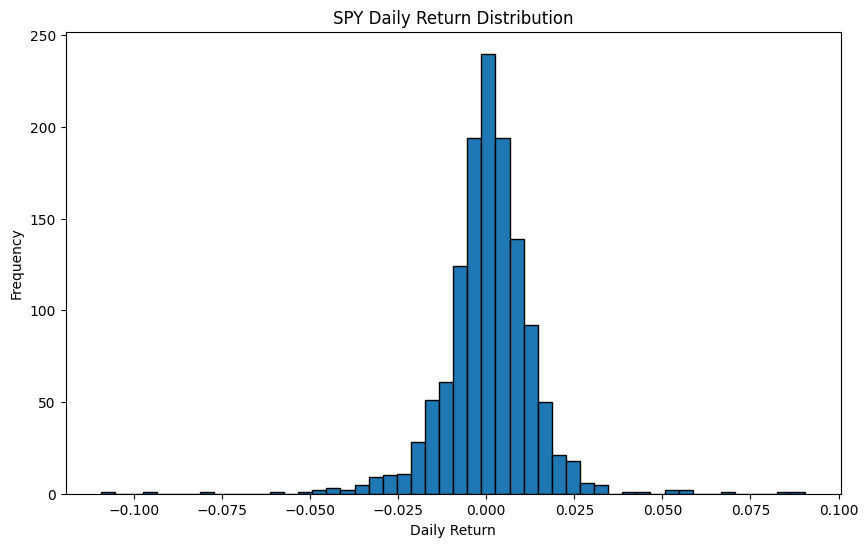

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(spy_data[('Daily_Return', 'SPY')], bins=50, edgecolor='k')
plt.title('SPY Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

4.3 Calcualte basic statistics (mean, median, standard deviation) for the Daily Returns

In [ ]:
# Calculate mean, median, and standard deviation of daily returns
mean_return = spy_data[('Close', 'SPY')].pct_change().mean()
median_return = spy_data[('Close', 'SPY')].pct_change().median()
std_return = spy_data[('Close', 'SPY')].pct_change().std()

print(f"Mean Daily Return: {mean_return}")
print(f"Median Daily Return: {median_return}")
print(f"Standard Deviation of Daily Returns: {std_return}")

Mean Daily Return: 0.0005697020105536102
Median Daily Return: 0.0009058331600915182
Standard Deviation of Daily Returns: 0.013205123394597057


4.4 Add a 10-day Exponential Moving Average (EMA) column to the data based on the "Adj Close" column (Hint: using the pandas_ta package.)

In [ ]:
!pip install pandas_ta

import pandas_ta as ta

# Calculate the 10-day EMA of the 'Close' price
spy_data[('EMA_10', 'SPY')] = ta.ema(spy_data[('Adj Close', 'SPY')], length=10)

# Check that the new column is added:
print(spy_data.columns)
spy_data.head(20)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=ace51ae52575385c3b86698629fca24d5d3fae36a505440352b158061f540a72
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta
MultiIndex([(   'Adj Close', 'SPY'),
            (       'Close', 'SPY'),
            (        'High', 'SPY'),
            (         'Low', 'SPY'),
            (        'Open', 'SPY'),
            (      'Volume', 'SPY'),
            ('Daily_Return', 'SPY'),
            (      'EMA_10', 'SPY')],
           names=['Price', 'Ticker'])


Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,EMA_10
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,,,
2020-01-02,301.194885,324.869995,324.890015,322.529999,323.540009,59151200,NaN,NaN
2020-01-03,298.914154,322.410004,323.640015,321.100006,321.160004,77709700,-0.007572,NaN
2020-01-06,300.054565,323.640015,323.730011,320.359985,320.489990,55653900,0.003815,NaN
2020-01-07,299.210876,322.730011,323.540009,322.239990,323.019989,40496400,-0.002812,NaN
2020-01-08,300.805450,324.450012,325.779999,322.670013,322.940002,68296000,0.005330,NaN
2020-01-09,302.845154,326.649994,326.730011,325.519989,326.160004,48473300,0.006781,NaN
2020-01-10,301.973694,325.709991,327.459991,325.200012,327.290009,53029300,-0.002878,NaN
2020-01-13,304.050354,327.950012,327.959991,325.920013,326.390015,47086800,0.006877,NaN


## 2 Linear Regression
Use Linear Regression to predict the Adjusted Close Price of the ETF based on the 10-day EMA. (Hint: Use scikit-learn package)

In [ ]:
# This is a Sample Code
# X_test = test_df['EMA_10']
# y_test = test_df['Adj Close']
# test_date=test_df.index
# X_train = train_df['EMA_10']
# y_train = train_df['Adj Close']
# train_date=train_df.index




# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
# reg = LinearRegression().fit(train_df['EMA_10'].values.reshape(-1, 1), train_df['Adj Close'])
# print("R2:", reg.score(train_df['EMA_10'].values.reshape(-1, 1), train_df['Adj Close']))
# print("intercept:", reg.intercept_)
# print("coeficient:", reg.coef_[0])
# model = sm.OLS(y_test, test_df['EMA_10'])
# results = model.fit()
# print(results.summary())

1. Handle missing values:


Replace any missing EMA values with reasonable estimates (e.g., the mean or mode of the initial EMA values).


Ensure there are no missing values remaining.

In [ ]:
# Replace missing value by mean value and check if there is any missing value left

spy_data[('EMA_10', 'SPY')] = spy_data[('EMA_10', 'SPY')].fillna(spy_data[('EMA_10', 'SPY')].mean())
print("Missing values after handling:")
print(spy_data.isnull().sum())
print(spy_data.head())


Missing values after handling:
Price         Ticker
Adj Close     SPY       0
Close         SPY       0
High          SPY       0
Low           SPY       0
Open          SPY       0
Volume        SPY       0
Daily_Return  SPY       1
EMA_10        SPY       0
dtype: int64
Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2020-01-02  301.194885  324.869995  324.890015  322.529999  323.540009   
2020-01-03  298.914154  322.410004  323.640015  321.100006  321.160004   
2020-01-06  300.054565  323.640015  323.730011  320.359985  320.489990   
2020-01-07  299.210876  322.730011  323.540009  322.239990  323.019989   
2020-01-08  300.805450  324.450012  325.779999  322.670013  322.940002   

Price         Volume Daily_Return      EMA_10  
Ticker           SPY          SPY         SPY  
Date                                  

2. Apply a Linear Regression model:

2.1 Use the entire dataset as input to the regression model.
*(Optional) Split the data into training and testing sets with an 80/20 ratio.*


2.2 Extract and interpret the model's coefficients and intercept.
Compute and visualize the residuals (the differences between actual and predicted values).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ensure  DataFrame has the needed columns, then drop rows with any NaNs
mldf_linear = spy_data[[('EMA_10', 'SPY'), ('Adj Close', 'SPY')]]

# Define feature matrix X (the EMA_10 column, reshape for sklearn) and target vector y (Adj Close)
X = mldf_linear[('EMA_10', 'SPY')].values.reshape(-1, 1)
y = mldf_linear[('Adj Close', 'SPY')].values

# Train-test split (80% train, 20% test; no shuffling to preserve time series order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train (fit) the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the learned parameters
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (slope): 0.9924328250699943
Intercept: 2.6651488844308346


In [ ]:
# Interpretation:
# Coefficient (slope): Tells how much the Adjusted Close price is expected to change for a 1-unit change in the 10-day EMA.
# Intercept: The predicted Adjusted Close when EMA = 0 (not necessarily meaningful but it’s part of the linear formula).

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Simple performance metrics
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 45.12347147492895
R-squared: 0.9662673583164131


In [ ]:
# Interpretation:
# Mean Squared Error (MSE): The average of the squared differences between predicted and actual values.
# R-squared: Measures the proportion of variance explained by the model (1.0 is perfect, 0.0 means no explanatory power).

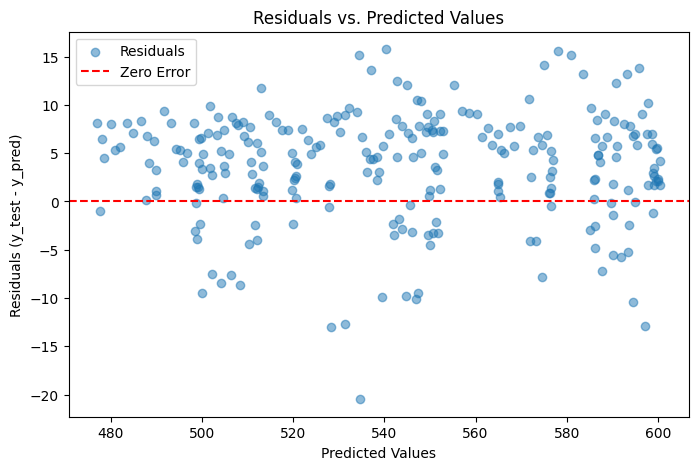

In [ ]:
# Visualizing the residual

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residuals vs. Predicted Values")
plt.legend()
plt.show()

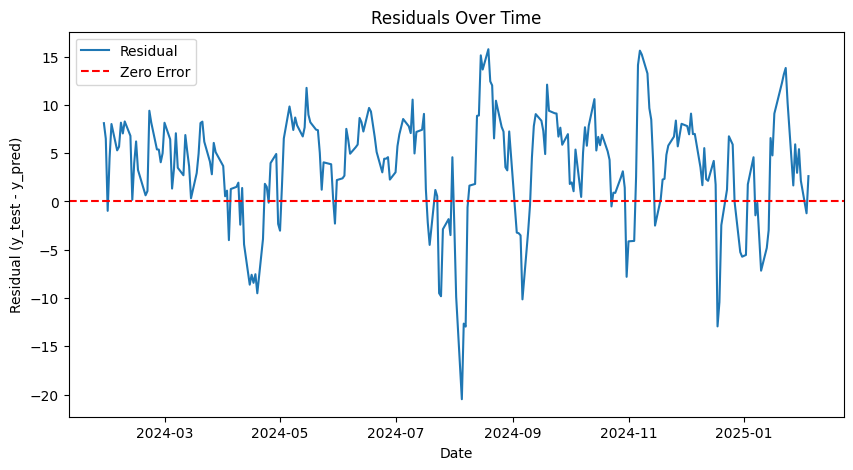

In [ ]:
# Visualizing the residual (over time)

test_index = spy_data.index[len(y_train):]

plt.figure(figsize=(10, 5))
plt.plot(test_index, residuals, label='Residual')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residual (y_test - y_pred)")
plt.legend()
plt.show()

3. Visualize the results:

3.1 Plot the actual Adjusted Close Prices against the model’s predictions.


3.2 Add a trendline showing the regression fit.

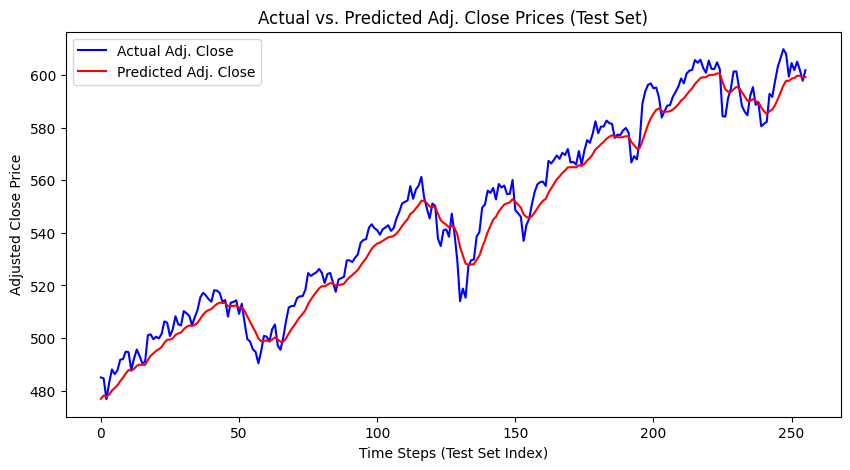

In [ ]:
# Plot over time

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Adj. Close", color='blue')
plt.plot(y_pred, label="Predicted Adj. Close", color='red')
plt.title("Actual vs. Predicted Adj. Close Prices (Test Set)")
plt.xlabel("Time Steps (Test Set Index)")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

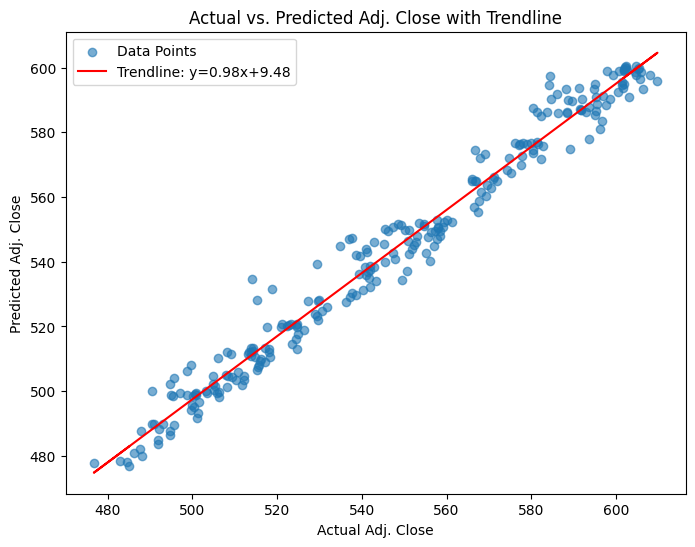

In [ ]:
# Scatter Plot with a Trendline (Actual vs. Predicted)

import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Data Points")

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color="red", label=f"Trendline: y={m:.2f}x+{b:.2f}")

plt.title("Actual vs. Predicted Adj. Close with Trendline")
plt.xlabel("Actual Adj. Close")
plt.ylabel("Predicted Adj. Close")
plt.legend()
plt.show()

## 3 Logistic Regression

Use Logistic Regression to classify whether the next day’s return is positive (1) or negative (0) based on historical data.


1. Prepare the Target Variable:

Create a binary target variable


$$
\text{Next Day Return (Binary)} =
\begin{cases}
1 & \text{if } \text{Daily Return} \geq 0, \\
0 & \text{if } \text{Daily Return} < 0.
\end{cases}
$$

In [ ]:
# Create next-day return by shifting Daily_Return by -1 to align the next day's return with today's row
spy_data[('Next_Day_Return','SPY')] = spy_data[('Daily_Return','SPY')].shift(-1)
spy_data[('Target','SPY')] = (spy_data[('Next_Day_Return','SPY')] >= 0).astype(int)
spy_data.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,EMA_10,Next_Day_Return,Target
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,,,,,
2020-01-02,301.194885,324.869995,324.890015,322.529999,323.540009,59151200,NaN,413.781277,-0.007572,0
2020-01-03,298.914154,322.410004,323.640015,321.100006,321.160004,77709700,-0.007572,413.781277,0.003815,1
2020-01-06,300.054565,323.640015,323.730011,320.359985,320.489990,55653900,0.003815,413.781277,-0.002812,0
2020-01-07,299.210876,322.730011,323.540009,322.239990,323.019989,40496400,-0.002812,413.781277,0.005330,1
2020-01-08,300.805450,324.450012,325.779999,322.670013,322.940002,68296000,0.005330,413.781277,0.006781,1
2020-01-09,302.845154,326.649994,326.730011,325.519989,326.160004,48473300,0.006781,413.781277,-0.002878,0
2020-01-10,301.973694,325.709991,327.459991,325.200012,327.290009,53029300,-0.002878,413.781277,0.006877,1
2020-01-13,304.050354,327.950012,327.959991,325.920013,326.390015,47086800,0.006877,413.781277,-0.001525,0


2. Apply Logistic Regression:

2.1 Use scikit-learn’s LogisticRegression model.
*(Optional) Split the data into training and testing sets with an 80/20 ratio.*


2.2 Fit the model on the entire dataset with 10-day EMA as the feature and the binary Next Day Return as the target.

In [ ]:
from sklearn.model_selection import train_test_split

# Select the relevant columns (feature & target) and drop rows with NaNs
mldf_logistic = spy_data[[('EMA_10','SPY'), ('Target','SPY')]].dropna()

# Define feature matrix (X) and target vector (y)
X = mldf_logistic[('EMA_10','SPY')].values.reshape(-1, 1)  # reshape for sklearn
y = mldf_logistic[('Target','SPY')].values

# Split into train & test sets (80% train, 20% test); no shuffle to preserve time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training set
log_reg.fit(X_train, y_train)

# Print out model coefficients
print("Coefficient (weight for EMA_10):", log_reg.coef_[0][0])
print("Intercept:", log_reg.intercept_[0])

# Evaluate on the test set
y_pred = log_reg.predict(X_test)

# Combine them into a single DataFrame to compare result
test_index = mldf_logistic.index[len(X_train):]
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index = test_index)

# Show the first 10 rows
print(results_df.head(10))

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Coefficient (weight for EMA_10): -0.0011911768890092052
Intercept: 0.6105719905135693
            Actual  Predicted
Date                         
2024-01-29       0          1
2024-01-30       0          1
2024-01-31       1          1
2024-02-01       1          1
2024-02-02       0          1
2024-02-05       1          1
2024-02-06       1          1
2024-02-07       1          1
2024-02-08       1          1
2024-02-09       0          1
Test Accuracy: 0.4453125

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.74      0.52       106
           1       0.56      0.24      0.34       150

    accuracy                           0.45       256
   macro avg       0.48      0.49      0.43       256
weighted avg       0.50      0.45      0.41       256



3. Interpret the Results:

3.1 Extract the model coefficients.
What does the coefficient represent in this context?


3.2 Explain the role of the intercept in determining probabilities.

In [ ]:
# The coefficient essentially quantifies the relationship between the predictor (EMA_10) and the log odds of the target (positive return = 1).
# It could be explained that for every 1-unit increase in the 10-day Exponential Moving Average (EMA_10), the log odds of the next day’s return being positive (vs. negative) decreases by 0.001191
# But since the magnitude is so small, higher EMA_10 values are just weakly associated with a lower probability of a positive return
# The coefficient suggests that EMA_10 has minimal predictive power for next-day returns
# perhaps it is reflecting a mean-reversion tendency but I am not too sure due to the magnitude of the coefficient

# The intercept is the baseline log odds of a positive return when predictor (EMA_10) is zero.
# Interpretation: If EMA_10 = 0 (which is unrealistic in practice, as prices cannot be zero), the log odds of a positive return would be 0.6105717
# The intercept shifts the baseline probability in the logistic function.
# If EMA_10 = 0, Log odds = 0.6105717 + (−0.001191*0) = 0.6105717 and probability would be e^0.6105717 / (1 + e^0.6105717) =
# Another case if EMA_10 = 400 (more realistic), Log odds = 0.6105717 + ( − 0.001191 * 400 ) = 0.6105717 − 0.4764 = 0.134 and probability would be